In [1]:
from pathlib import Path
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib as plt
import pursuit_functions
import pyarrow as pa

pd.set_option('display.max_columns', 100)  # Show more columns (default is 20)

%load_ext autoreload
%autoreload 2

# TODO: 
# * normalize column names (i.e. sessFile -> dataDir)
# * look into LP03_03_pursuitRoot.mat corruption

In [3]:


def optimize_pyarrow_dtypes(df):
    """
    Optimizes PyArrow-backed dtypes in a DataFrame by selecting the smallest appropriate dtype
    for each column based on value ranges.
    
    Parameters:
        df (pd.DataFrame): A DataFrame with PyArrow-backed dtypes.

    Returns:
        pd.DataFrame: A DataFrame with optimized PyArrow-backed dtypes.
    """
    optimized_dtypes = {}

    for col in df.columns:
        if pd.api.types.is_integer_dtype(df[col]):
            min_val, max_val = df[col].min(), df[col].max()

            # Select the most efficient integer dtype
            if min_val >= 0 and max_val <= 255:
                optimized_dtypes[col] = pd.ArrowDtype(pa.uint8())
            elif min_val >= 0 and max_val <= 65535:
                optimized_dtypes[col] = pd.ArrowDtype(pa.uint16())
            elif min_val >= -128 and max_val <= 127:
                optimized_dtypes[col] = pd.ArrowDtype(pa.int8())
            elif min_val >= -32768 and max_val <= 32767:
                optimized_dtypes[col] = pd.ArrowDtype(pa.int16())
            elif min_val >= -(2**31) and max_val <= (2**31 - 1):
                optimized_dtypes[col] = pd.ArrowDtype(pa.int32())
            else:
                optimized_dtypes[col] = pd.ArrowDtype(pa.int64())

        elif pd.api.types.is_float_dtype(df[col]):
            min_val, max_val = df[col].min(), df[col].max()

            # Select the most efficient float dtype
            if min_val >= -65504 and max_val <= 65504:
                optimized_dtypes[col] = pd.ArrowDtype(pa.float16())
            elif min_val >= -(2**31) and max_val <= (2**31 - 1):
                optimized_dtypes[col] = pd.ArrowDtype(pa.float32())
            else:
                optimized_dtypes[col] = pd.ArrowDtype(pa.float64())

    # Convert DataFrame dtypes
    return df.astype(optimized_dtypes)



In [13]:
#load region files
data_dir = Path("/Volumes/ASA_Lab/Data/Andy/nitzPurusitData")
#"/Users/may/pursuitSessionFiles")
#data_dir = Path("/Volumes/ASA_Lab/Data/Xiaoxiao/ppcRscEVCPoster/pursuitSessionFiles")
region_directories = pursuit_functions.file_reader.load_region_files(data_dir, 'Rsc.mat')
print("Extracted structures:", region_directories.keys())

Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/slRsc.mat
Extracted structures: dict_keys(['slRsc'])


In [36]:
np.unique(region_directories['slRsc']['sessFile'])

array(['KB10_01_pursuitRoot.mat', 'KB10_02_pursuitRoot.mat',
       'KB10_03_pursuitRoot.mat', 'KB10_04_pursuitRoot.mat',
       'KB10_06_pursuitRoot.mat', 'KB10_07_pursuitRoot.mat',
       'KB10_08_pursuitRoot.mat', 'KB10_09_pursuitRoot.mat',
       'KB10_10_pursuitRoot.mat', 'KB10_11_pursuitRoot.mat',
       'KB10_13_pursuitRoot.mat', 'KB10_15_pursuitRoot.mat',
       'KB10_17_pursuitRoot.mat', 'KB10_20_pursuitRoot.mat',
       'KB20_02_pursuitRoot.mat', 'KB20_03_pursuitRoot.mat',
       'KB20_04_pursuitRoot.mat', 'KB20_05_pursuitRoot.mat',
       'KB20_06_pursuitRoot.mat', 'KB20_07_pursuitRoot.mat',
       'KB20_09_pursuitRoot.mat', 'KB20_10_pursuitRoot.mat',
       'KB20_11_pursuitRoot.mat', 'KB20_12_pursuitRoot.mat',
       'KB20_13_pursuitRoot.mat', 'KB20_14_pursuitRoot.mat',
       'KB20_15_pursuitRoot.mat', 'KB20_19_pursuitRoot.mat',
       'KB20_21_pursuitRoot.mat', 'KB20_22_pursuitRoot.mat',
       'KB20_24_pursuitRoot.mat', 'KB20_25_pursuitRoot.mat',
       'KB20_26_pursuitR

In [12]:
for key in region_directories['slRsc'].keys():
    print(f"{key}: {type(region_directories['slRsc'][key])}, shape: {region_directories['slRsc'][key].shape}")

sessFile: <class 'numpy.ndarray'>, shape: (136,)
tt: <class 'numpy.ndarray'>, shape: (136,)
cellIndex: <class 'numpy.ndarray'>, shape: (136,)
spkTimes: <class 'numpy.ndarray'>, shape: (136,)
blocks: <class 'numpy.ndarray'>, shape: (136,)


In [ ]:
# 1 here is the trial block type
# there is only one valid block type per outer row 
region_directories['slRsc']['blocks'][0][1] 

array([  6152., 141262.])

In [ ]:
#for x in region_directories['slRsc']['spkTimes'][0]:
#    print(f"{x:.4}")
# when spikes were detected in seconds

0.05412
0.2006
0.7721
1.212
1.449
1.491
1.52
1.588
1.727
2.077
2.096
2.131
2.154
2.194
2.237
2.339
2.435
2.458
2.499
2.834
3.067
3.163
3.192
3.212
3.224
3.237
3.291
3.382
3.413
3.437
3.546
3.551
3.554
3.612
3.706
3.767
3.807
3.892
3.932
3.936
3.99
4.04
4.06
4.083
4.104
4.157
4.182
4.221
4.239
4.244
4.289
4.308
4.463
4.729
4.753
4.78
4.952
5.017
5.262
5.515
6.061
6.116
6.165
6.199
6.294
6.362
6.453
6.717
6.996
7.195
7.279
7.433
7.483
7.553
7.627
8.004
8.188
8.243
8.486
8.551
8.86
8.946
9.422
9.532
9.64
9.681
9.773
9.859
9.894
10.07
10.11
10.31
10.35
10.39
10.44
10.51
10.55
10.58
10.64
10.7
10.77
10.86
11.09
11.26
11.33
11.37
11.39
11.4
11.43
11.46
11.47
11.58
11.62
11.68
11.76
11.81
12.0
12.14
12.43
12.65
12.78
12.85
12.89
12.99
13.0
13.06
13.08
13.17
13.21
13.34
13.36
13.61
13.66
13.7
13.72
13.74
13.75
13.79
13.8
13.85
13.87
13.94
14.06
14.25
14.37
15.52
15.62
15.7
15.72
15.75
15.79
15.94
16.04
16.32
16.5
16.76
16.79
16.87
16.93
17.02
17.1
17.43
17.65
18.52
18.64
18.72
18.81
18.83
18.8

In [ ]:
#load pursuit files
data_dir = Path("/Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions")
#data_dir = Path("/Volumes/ASA_Lab/Data/Xiaoxiao/ppcRscEVCPoster/pursuitSessionFiles")

include_files = np.unique(region_directories['slRsc']['sessFile'])
pursuit_session_files = pursuit_functions.file_reader.load_session_files(data_dir, include_files=include_files)


Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_12_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_13_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_17_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_18_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_19_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_20_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_22_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_23_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_24_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_25_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09_26_pursuitRoot.mat
Loading: /Volumes/ASA_Lab/Data/Andy/nitzPurusitData/Sessions/KB09

KeyboardInterrupt: 

In [6]:
#set a variable to a region_directories file
ca1_directory = pd.DataFrame(region_directories['ca1SL'])
ca3_directory = pd.DataFrame(region_directories['ca3SL'])
rsc_directory = pd.DataFrame(region_directories['rscSL'])

#display first few rows of the dataframe
ca1_directory.head()
ca3_directory.head()
rsc_directory.head()

,sessFile,tt,cellIndex,spkTimes,recNum,bsFile,blocks,frFile,muRate,peakRate,burstIndexBlocks,smFile,smRm,recHemi
0,KB10_02_pursuitRoot.mat,17,1,"[0.1669, 0.28305, 0.380875, 0.751525, 0.764025...",22,KB10_02_BS_tt17c1.mat,"[[88504.0, 144672.0], [8320.0, 86109.0], [nan,...",KB10_02_frAnalysis_tt17c1.mat,"(4.692906611241162, array([4.81011602, 4.03313...","(16.519418703312862, array([18.17084393, 15.20...","[[0.00422892585283338, 0.007944915254237288, n...",KB10_02_selfMotion_tt17c1.mat,"(array([[[4.63917526, 4.63917526, nan],...",1
1,KB10_02_pursuitRoot.mat,25,2,"[0.137075, 1.542725, 1.817975, 1.9046, 1.9853,...",22,KB10_02_BS_tt25c2.mat,"[[88504.0, 144672.0], [8320.0, 86109.0], [nan,...",KB10_02_frAnalysis_tt25c2.mat,"(2.9235510103222015, array([2.63846026, 2.8036...","(10.614618064280595, array([10.20781357, 10.99...","[[0.028413575374901343, 0.029219143576826197, ...",KB10_02_selfMotion_tt25c2.mat,"(array([[[2.4742268 , 3.09278351, nan],...",1
2,KB10_03_pursuitRoot.mat,17,1,"[0.31265, 0.40455, 0.445, 0.4775, 0.518525, 0....",23,KB10_03_BS_tt17c1.mat,"[[96666.0, 150971.0], [7012.0, 95499.0], [nan,...",KB10_03_frAnalysis_tt17c1.mat,"(8.021706903089898, array([6.45894457, 8.41191...","(22.749134609044773, array([20.92174844, 23.74...","[[0.007995202878273036, 0.014315111389460499, ...",KB10_03_selfMotion_tt17c1.mat,"(array([[[ 7.83289817, 8.77284595, na...",1
3,KB10_08_pursuitRoot.mat,17,2,"[0.00245, 0.26885, 0.33075, 0.362575, 0.393025...",28,KB10_08_BS_tt17c2.mat,"[[71396.0, 129658.0], [3303.0, 68617.0], [nan,...",KB10_08_frAnalysis_tt17c2.mat,"(12.618480565373458, array([11.3938197 , 12.81...","(27.7547058072976, array([26.3693488 , 28.0684...","[[0.003832151753209427, 0.0035780842340663436,...",KB10_08_selfMotion_tt17c2.mat,"(array([[[ 8.80989181, 12.42658423, na...",1
4,KB10_09_pursuitRoot.mat,17,2,"[0.951425, 1.18095, 1.861625, 1.908275, 2.6613...",29,KB10_09_BS_tt17c2.mat,"[[80670.0, 170910.0], [6153.0, 73687.0], [nan,...",KB10_09_frAnalysis_tt17c2.mat,"(5.106691507714666, array([5.99589072, 3.70028...","(18.579987410995223, array([20.95010962, 13.91...","[[0.06509289006844532, 0.040225563909774435, n...",KB10_09_selfMotion_tt17c2.mat,"(array([[[4.4516129 , 3. , nan],...",1


In [7]:
#convert extracted pursuit session data into dataframes
pursuit_df = {
    filename: pd.DataFrame(file_data).convert_dtypes(dtype_backend="pyarrow")
    for filename, file_data in pursuit_session_files.items()
}

#display first few rows of a dataframe for a specific pursuit file
pursuit_df['KB20_09_pursuitRoot.mat'].head()

,time,ind,ratPos_1,ratPos_2,laserPos_1,laserPos_2,ratVel,ratAcc,laserVel,laserAcc,ratMoveDir,laserMoveDir,ratHeadDir,ratAV,laserAV,laserDist,laserBearingMD,laserBearingHD,centerDist,centerBearingMD,centerBearingHD,spkTable_1,spkTable_2,spkTable_3,spkTable_4,spkTable_5,spkTable_6,spkTable_7,spkTable_8,spkTable_9,spkTable_10
0,0.016667,1,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,-2.033685,0.714289,<NA>,<NA>,0.004366,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0
1,0.033334,2,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,-2.08084,0.718656,<NA>,0.047155,0.00074,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0
2,0.050001,3,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,-2.126666,0.719396,<NA>,0.045827,0.000309,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0
3,0.066668,4,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,-2.17155,0.719705,<NA>,0.044883,0.000172,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,1,0
4,0.083335,5,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,-2.21625,0.719877,<NA>,0.0447,0.000112,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0


In [8]:
#extract trial block indices for all 3 region directory dataframes

def extract_trial_blocks(region_directory):
    """Extracts start and end indices for trial blocks and stores them as separate columns."""

    #ensure column names are clean
    region_directory.columns = region_directory.columns.str.strip()

    #determine the correct block column structure
    has_blocks = "blocks" in region_directory.columns
    has_separate_blocks = all(col in region_directory.columns for col in ["feBlock", "pursuitBlock", "feBlock2"])

    if not has_blocks and not has_separate_blocks:
        print(f"Warning: No recognized block column found in {region_directory}. Skipping extraction.")
        return region_directory

    #convert NumPy arrays to lists only if using separate columns (CA3)
    if has_separate_blocks:
        for col in ["feBlock", "pursuitBlock", "feBlock2"]:
            region_directory[col] = region_directory[col].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

    # extract trial block start/end indices
    if has_blocks:  # CA1 & RSC (Single "blocks" column)
        region_directory["FE1_start"] = region_directory["blocks"].apply(lambda x: x[0][0])
        region_directory["FE1_end"] = region_directory["blocks"].apply(lambda x: x[0][1])
        region_directory["pursuit_start"] = region_directory["blocks"].apply(lambda x: x[1][0])
        region_directory["pursuit_end"] = region_directory["blocks"].apply(lambda x: x[1][1])
        region_directory["FE2_start"] = region_directory["blocks"].apply(lambda x: x[2][0])
        region_directory["FE2_end"] = region_directory["blocks"].apply(lambda x: x[2][1])
    elif has_separate_blocks:  # CA3 (Separate columns)
        region_directory["FE1_start"] = region_directory["feBlock"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
        region_directory["FE1_end"] = region_directory["feBlock"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)
        region_directory["pursuit_start"] = region_directory["pursuitBlock"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
        region_directory["pursuit_end"] = region_directory["pursuitBlock"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)
        region_directory["FE2_start"] = region_directory["feBlock2"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
        region_directory["FE2_end"] = region_directory["feBlock2"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)

    return region_directory

# apply the function to all region dataframes
ca1_directory = extract_trial_blocks(ca1_directory)
ca3_directory = extract_trial_blocks(ca3_directory)
rsc_directory = extract_trial_blocks(rsc_directory)


In [9]:
ca3_directory.head()


,dataDir,recNum,tt,cellIndex,spkTimes,feBlock,feBlock2,pursuitBlock,FE1_start,FE1_end,pursuit_start,pursuit_end,FE2_start,FE2_end
0,KB09\36\,15,21,1,"[3.8089, 3.821775, 3.8328, 3.83945, 3.847775, ...","[75518, 110224]","[nan, nan]","[3362, 74642]",75518,110224,3362,74642,NaN,NaN
1,KB09\36\,15,21,2,"[0.0808, 0.167325, 2.077925, 2.17205, 2.2591, ...","[75518, 110224]","[nan, nan]","[3362, 74642]",75518,110224,3362,74642,NaN,NaN
2,KB09\36\,15,21,3,"[0.407975, 0.4343, 0.5626, 0.586675, 0.643175,...","[75518, 110224]","[nan, nan]","[3362, 74642]",75518,110224,3362,74642,NaN,NaN
3,KB09\36\,15,21,4,"[0.21155, 0.22325, 0.287125, 0.343425, 0.80812...","[75518, 110224]","[nan, nan]","[3362, 74642]",75518,110224,3362,74642,NaN,NaN
4,KB09\36\,15,29,5,"[0.61335, 2.938225, 5.963775, 5.973725, 6.5566...","[75518, 110224]","[nan, nan]","[3362, 74642]",75518,110224,3362,74642,NaN,NaN


In [11]:
#make the mega dataset

import os
import pandas as pd

def clean_session_filename(file_path):
    """Extract and format the correct session file name from a directory path."""
    cleaned_name = os.path.basename(file_path).replace("\\", "_")

    return (
        cleaned_name if cleaned_name.endswith("_pursuitRoot.mat") 
        else cleaned_name + "pursuitRoot.mat"
    )

def process_row(row, session_col, pursuit_df, region_name):
    """Helper function to process each row and extract trial blocks."""
    sessFile = row[session_col]
    if session_col == "dataDir":
        sessFile = clean_session_filename(sessFile)

    session_data = pursuit_df.get(sessFile)
    if session_data is None:
        print(f"Warning: Session file {sessFile} not found in pursuit_df. Skipping.")
        return None

    blocks = {
        "FE1": (row["FE1_start"], row["FE1_end"]),
        "pursuit": (row["pursuit_start"], row["pursuit_end"]),
        "FE2": (row["FE2_start"], row["FE2_end"])
    }

    
    extracted_blocks = [
        session_data.iloc[int(start): int(end) + 1].assign(
            region=region_name, trial_block=trial_block, sessFile=sessFile
        )
        for trial_block, (start, end) in blocks.items()
        if pd.notna(start) and pd.notna(end)
    ]
    return extracted_blocks

def extract_and_slice_region_data(region_name, region_directory, pursuit_df):
    """Extract trial block indices and slice corresponding session files."""
    session_col = "sessFile" if "sessFile" in region_directory.columns else "dataDir"

    extracted_data = [
        block
        for _, row in region_directory.iterrows()
        for block in (process_row(row, session_col, pursuit_df, region_name) or [])
    ]

    if not extracted_data:
        return pd.DataFrame()

    new_cols = ["region", "trial_block", "sessFile"]
    out = pd.concat(extracted_data, ignore_index=True).dropna(axis=1, how="all").astype({'region': "category", 'trial_block': "category", 'sessFile': "category"})
    existing_columns = [col for col in out.columns if col not in new_cols]
    out = out[existing_columns + new_cols]
    return optimize_pyarrow_dtypes(out)

ca1_data = extract_and_slice_region_data("CA1", ca1_directory, pursuit_df)
ca3_data = extract_and_slice_region_data("CA3", ca3_directory, pursuit_df)
rsc_data = extract_and_slice_region_data("RSC", rsc_directory, pursuit_df)
# TODO: save to parquet file, maybe

# Combine all regions into a single dataset
all_regions_data = pd.concat([ca1_data, ca3_data, rsc_data], ignore_index=True)

# Sort data
all_regions_data = all_regions_data.sort_values(by=["sessFile", "region", "trial_block"]).reset_index(drop=True)

# Display the final dataset
all_regions_data.head()

#save dataframe to a parquet file
all_regions_data.to_parquet("/Users/may/pursuit/ca1_ca3_rsc_pursuit_data.parquet", engine="pyarrow", index=True)

In [46]:
all_regions_data[(all_regions_data["region"] == "CA3") & (all_regions_data["trial_block"] == "pursuit")]



,time,ind,ratPos_1,ratPos_2,laserPos_1,laserPos_2,ratVel,ratAcc,laserVel,laserAcc,ratMoveDir,laserMoveDir,ratHeadDir,ratAV,laserAV,laserDist,laserBearingMD,laserBearingHD,centerDist,centerBearingMD,centerBearingHD,spkTable_1,spkTable_2,spkTable_3,spkTable_4,spkTable_5,spkTable_6,spkTable_7,spkTable_8,spkTable_9,spkTable_10,spkTable_11,spkTable_12,spkTable_13,spkTable_14,spkTable_15,spkTable_16,spkTable_17,spkTable_18,spkTable_19,spkTable_20,spkTable_21,spkTable_22,spkTable_23,spkTable_24,spkTable_25,spkTable_26,spkTable_27,spkTable_28,spkTable_29,spkTable_30,spkTable_31,spkTable_32,spkTable_33,spkTable_34,region,trial_block,sessFile
4504589,56.0625,3363,143.625,87.1875,145.625,66.3125,52.9375,38.5625,32.09375,16.21875,-1.609375,-1.9375,-1.517578,-0.009628,0.007812,20.921875,0.133911,0.042358,5.914062,-0.868652,-0.960449,0,0,1,0,0,0,0,0,0,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB09_36_pursuitRoot.mat
4504590,56.0625,3364,143.625,86.1875,145.5,65.9375,53.375,33.09375,32.1875,17.78125,-1.600586,-1.929688,-1.514648,-0.008865,0.008423,20.34375,0.119507,0.03363,5.382812,-1.024414,-1.110352,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB09_36_pursuitRoot.mat
4504591,56.09375,3365,143.625,85.1875,145.25,65.4375,53.75,27.796875,32.3125,19.21875,-1.591797,-1.920898,-1.511719,-0.008118,0.009003,19.78125,0.104797,0.02449,4.980469,-1.211914,-1.292969,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB09_36_pursuitRoot.mat
4504592,56.09375,3366,143.625,84.125,145.125,64.9375,53.96875,23.046875,32.46875,20.515625,-1.584961,-1.912109,-1.508789,-0.007385,0.00956,19.234375,0.089966,0.013741,4.769531,-1.426758,-1.50293,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB09_36_pursuitRoot.mat
4504593,56.125,3367,143.75,83.125,145.0,64.4375,54.125,19.453125,32.625,21.703125,-1.578125,-1.902344,-1.503906,-0.006672,0.010109,18.671875,0.075134,0.000664,4.777344,-1.65332,-1.727539,0,0,0,1,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB09_36_pursuitRoot.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16656557,1740.0,104377,186.625,93.4375,194.375,92.8125,44.46875,54.40625,29.421875,622.0,-0.581055,-1.30957,-0.489258,0.012024,-0.328857,7.753906,0.499268,0.407471,40.9375,-2.519531,-2.613281,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_27_pursuitRoot.mat
16656558,1740.0,104378,187.25,92.9375,194.625,92.5,43.71875,56.15625,31.578125,700.5,-0.593262,-1.638672,-0.510742,0.011909,-0.288086,7.371094,0.533691,0.450928,41.59375,-2.521484,-2.603516,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_27_pursuitRoot.mat
16656559,1740.0,104379,188.0,92.4375,195.0,92.375,42.9375,58.03125,37.5,783.5,-0.60498,-1.926758,-0.529297,0.01181,-0.213989,7.011719,0.590332,0.514648,42.25,-2.521484,-2.597656,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_27_pursuitRoot.mat
16656560,1740.0,104380,188.625,92.0,195.125,92.25,42.125,59.96875,46.84375,871.0,-0.616699,-2.140625,-0.544922,0.011734,-0.148682,6.550781,0.659668,0.587891,42.875,-2.521484,-2.59375,0,0,0,0,<NA>

In [161]:
#identifying pursuit, shortcut, and characteristic trials

df = all_regions_data[(all_regions_data["region"] == "CA3") & (all_regions_data["trial_block"] == "pursuit")].copy()
df["ratMoveDir"] = df["ratMoveDir"].astype("float64")
df["laserMoveDir"] = df["laserMoveDir"].astype("float64")
df["laserDist"] = df["laserDist"].astype("float64")
df["ratVel"] = df["ratVel"].astype("float64")
df["laserBearingMD"] = df["laserBearingMD"].astype("float64")

#identifying start of runs

df["movement_alignment"] = np.abs(df["ratMoveDir"] - df["laserMoveDir"])

coherent_movement = (df["movement_alignment"] < np.deg2rad(30)) & (df["ratVel"] > 2) & (df["laserVel"] >2)

approaching_laser = df["laserDist"].diff() < 0

df["start_of_run"] = coherent_movement & approaching_laser

#identifying end of runs
rat_reached_laser = df["laserDist"] < 3 #i can change this threshold

tracking_lost = df["laserDist"].isna() | df["laserDist"].diff().abs() > 50

rat_stops = df["ratVel"].diff() < -2 #looking for velocity drops

df["end_of_run"] = rat_reached_laser | tracking_lost | rat_stops

#identifying trial types
#compute median and variance of egocentric measures for each trial
trial_stats = df.groupby("sessFile")[["laserBearingMD", "laserDist"]].agg(["median", "std"])
trial_stats.columns = ['_'.join(col).strip() for col in trial_stats.columns]
trial_stats = trial_stats.reset_index()
df = df.merge(trial_stats, on="sessFile", how="left")

#defining thresholds for trajectory types
rt_threshold = trial_stats["laserBearingMD_std"].quantile(0.30)
ct_threshold = trial_stats["laserBearingMD_std"].quantile(0.20)
sc_threshold = trial_stats["laserDist_median"].quantile(0.15)

df["trial_type"] = "CT"
df.loc[df["laserBearingMD_std"] > rt_threshold, "trial_type"] = "RT"
df.loc[df["laserBearingMD_std"] < ct_threshold, "trial_type"] = "CT"
df.loc[df["laserDist_median"] < sc_threshold, "trial_type"] = "SC"

print(trial_stats.describe())


       laserBearingMD_median  laserBearingMD_std  laserDist_median  \
count               7.000000            7.000000          7.000000   
mean                0.184361            1.484761         27.300223   
std                 0.074544            0.060052          2.100850   
min                 0.088257            1.390572         23.875000   
25%                 0.122162            1.451696         26.304688   
50%                 0.203308            1.496883         27.078125   
75%                 0.247192            1.519261         28.597656   
max                 0.260254            1.563955         30.343750   

       laserDist_std  
count       7.000000  
mean       16.470885  
std         3.961178  
min        12.891533  
25%        13.564481  
50%        16.482779  
75%        17.203051  
max        24.386819  


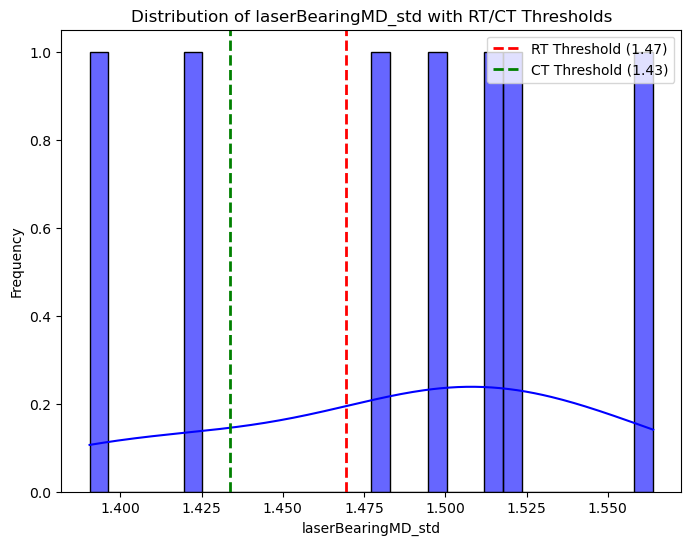

In [ ]:
#create a histogram for laserBearingMD_std

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for laserBearingMD_std
plt.figure(figsize=(8, 6))
sns.histplot(trial_stats["laserBearingMD_std"], bins=30, kde=True, color="blue", alpha=0.6)

# Overlay RT and CT thresholds as vertical lines
plt.axvline(rt_threshold, color="red", linestyle="dashed", linewidth=2, label=f"RT Threshold ({rt_threshold:.2f})")
plt.axvline(ct_threshold, color="green", linestyle="dashed", linewidth=2, label=f"CT Threshold ({ct_threshold:.2f})")

plt.xlabel("laserBearingMD_std")
plt.ylabel("Frequency")
plt.title("Distribution of laserBearingMD_std with RT/CT Thresholds")
plt.legend()
plt.show()


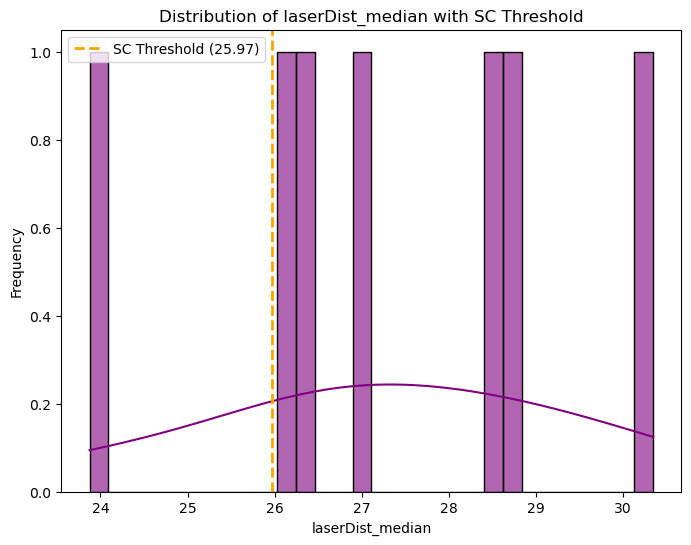

In [ ]:
# create a histogram for laserDist_median
plt.figure(figsize=(8, 6))
sns.histplot(trial_stats["laserDist_median"], bins=30, kde=True, color="purple", alpha=0.6)

# Overlay Shortcut (SC) threshold
plt.axvline(sc_threshold, color="orange", linestyle="dashed", linewidth=2, label=f"SC Threshold ({sc_threshold:.2f})")

plt.xlabel("laserDist_median")
plt.ylabel("Frequency")
plt.title("Distribution of laserDist_median with SC Threshold")
plt.legend()
plt.show()


No RT trials found for session KB09_36_pursuitRoot.mat. Skipping RT plot.
No SC trials found for session KB09_36_pursuitRoot.mat. Skipping SC plot.


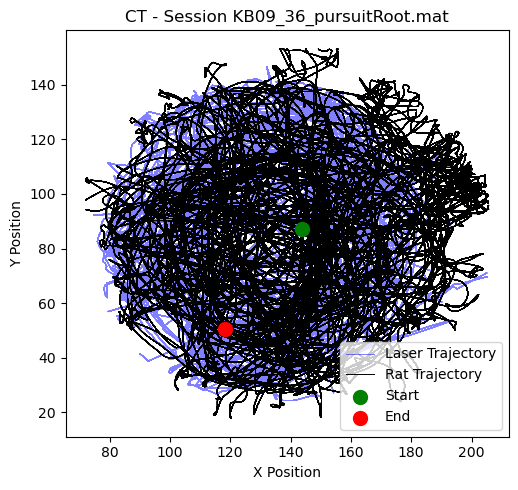

No RT trials found for session KB09_37_pursuitRoot.mat. Skipping RT plot.
No SC trials found for session KB09_37_pursuitRoot.mat. Skipping SC plot.


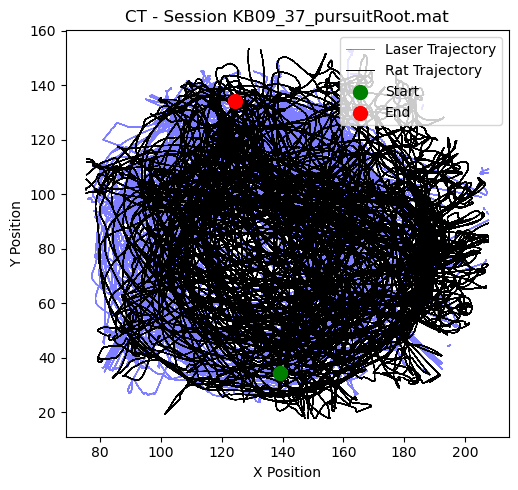

No CT trials found for session KB10_17_pursuitRoot.mat. Skipping CT plot.
No SC trials found for session KB10_17_pursuitRoot.mat. Skipping SC plot.


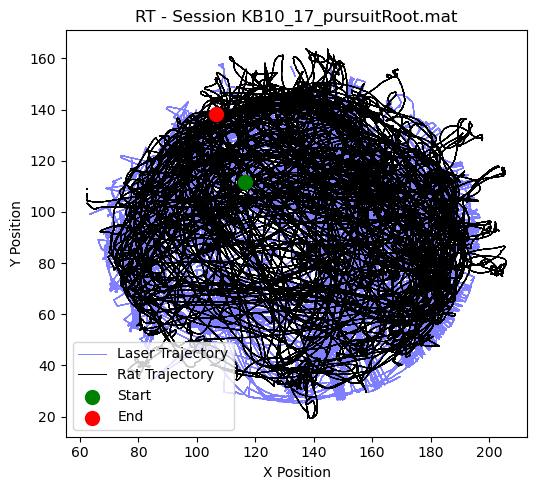

No CT trials found for session KB10_19_pursuitRoot.mat. Skipping CT plot.
No SC trials found for session KB10_19_pursuitRoot.mat. Skipping SC plot.


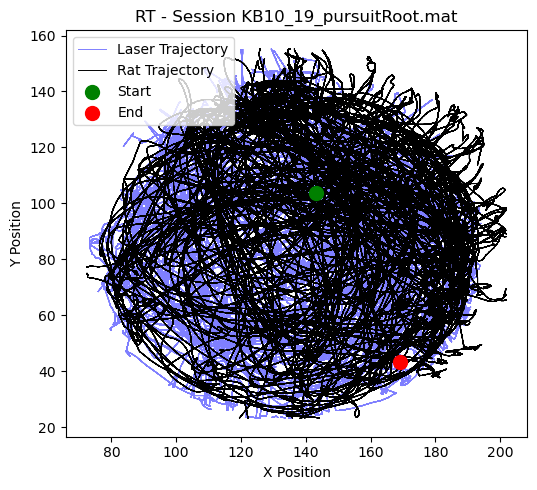

No RT trials found for session KB10_20_pursuitRoot.mat. Skipping RT plot.
No CT trials found for session KB10_20_pursuitRoot.mat. Skipping CT plot.


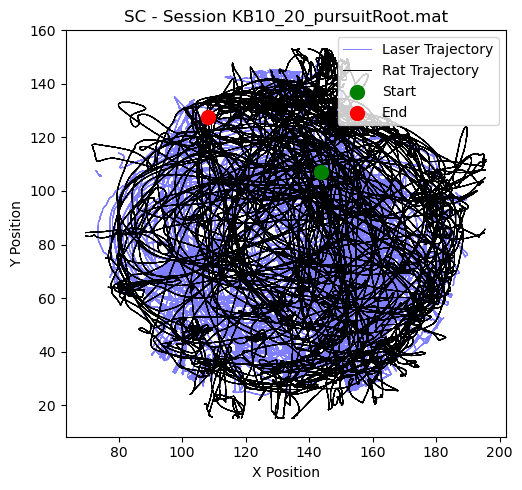

No CT trials found for session KB10_23_pursuitRoot.mat. Skipping CT plot.
No SC trials found for session KB10_23_pursuitRoot.mat. Skipping SC plot.


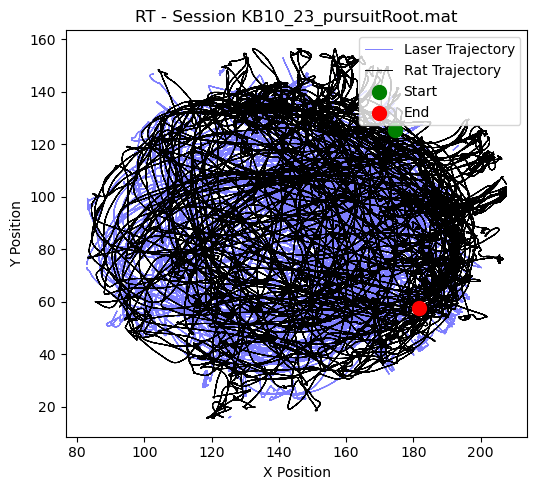

No CT trials found for session KB10_27_pursuitRoot.mat. Skipping CT plot.
No SC trials found for session KB10_27_pursuitRoot.mat. Skipping SC plot.


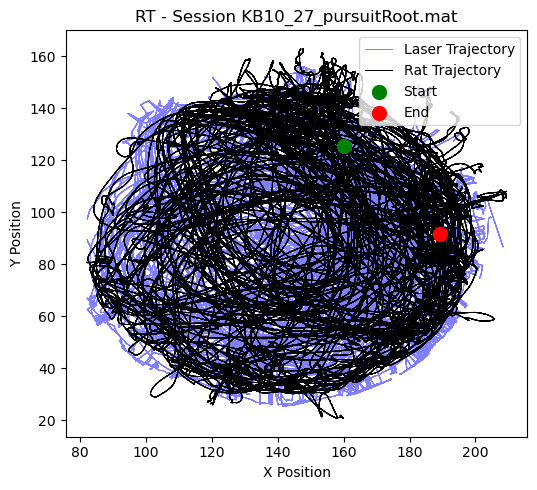

In [ ]:
#plot pseudorandom, characteristic, and shortcut trials

import matplotlib.pyplot as plt

# Get all session IDs where region == "CA3" and trial_block == "pursuit"
session_ids = df[(df["region"] == "CA3") & (df["trial_block"] == "pursuit")]["sessFile"].unique()
trial_types = ["RT", "CT", "SC"]  # Pseudorandom, Characteristic, Shortcut

for session_id in session_ids:  # Loop through all sessions
    plt.figure(figsize=(15, 5))  # Create a wide figure for side-by-side plots

    for i, trial_type in enumerate(trial_types):  # Loop through RT, CT, SC
        df_session = df[(df["sessFile"] == session_id) & (df["trial_type"] == trial_type)].copy()

        # Skip if there are no trials of this type
        if df_session.empty:
            print(f"No {trial_type} trials found for session {session_id}. Skipping {trial_type} plot.")
            continue

        # Convert halffloat columns to float64
        df_session["ratPos_1"] = df_session["ratPos_1"].astype("float64")
        df_session["ratPos_2"] = df_session["ratPos_2"].astype("float64")

        # Create subplot for this trial type
        ax = plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, current index

        # Plot the laser's trajectory
        ax.plot(df_session["laserPos_1"], df_session["laserPos_2"], color="blue", linewidth=0.7, alpha=0.5, label="Laser Trajectory", zorder=1)

        # Plot the rat's trajectory
        ax.plot(df_session["ratPos_1"], df_session["ratPos_2"], color="black", linewidth=0.7, label="Rat Trajectory", zorder=2)

        # Mark start and end points
        ax.scatter(df_session["ratPos_1"].iloc[0], df_session["ratPos_2"].iloc[0], color="green", label="Start", s=100, zorder=3)
        ax.scatter(df_session["ratPos_1"].iloc[-1], df_session["ratPos_2"].iloc[-1], color="red", label="End", s=100, zorder=3)

        ax.set_xlabel("X Position")
        ax.set_ylabel("Y Position")
        ax.set_title(f"{trial_type} - Session {session_id}")
        ax.legend()

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


In [ ]:
# compute latency between rat position and target position 

import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# Convert all halffloat columns to float64
float_columns = ["ratPos_1", "ratPos_2", "laserPos_1", "laserPos_2"]
df_session[float_columns] = df_session[float_columns].astype("float64")

def compute_latency(df_session, max_shift=60, step_size=2):
    rat_pos = np.vstack((df_session["ratPos_1"], df_session["ratPos_2"])).T
    target_pos = np.vstack((df_session["laserPos_1"], df_session["laserPos_2"])).T

    max_corr = -1
    optimal_shift = 0
    shifts = np.arange(-max_shift, max_shift + 1, step_size)

    print("\nShift (ms) | Spearman Correlation")
    print("-" * 35)

    for shift in shifts:
        if shift > 0:
            shifted_rat = rat_pos[:-shift]
            shifted_target = target_pos[shift:]
        elif shift < 0:
            shifted_rat = rat_pos[-shift:]
            shifted_target = target_pos[:shift]
        else:
            shifted_rat = rat_pos
            shifted_target = target_pos
    
        # Mask to remove NaNs before correlation
        mask = ~np.isnan(shifted_rat).any(axis=1) & ~np.isnan(shifted_target).any(axis=1)
        shifted_rat, shifted_target = shifted_rat[mask], shifted_target[mask]

        # If arrays are empty after removing NaNs, continue to the next shift
        if len(shifted_rat) == 0 or len(shifted_target) == 0:
            print(f"Skipping shift {shift * (1000 / 30):>9.0f} ms due to empty arrays.")
            continue


        # Compute Spearman correlation
        corr, _ = spearmanr(shifted_rat.ravel(), shifted_target.ravel())

        print(f"{shift * (1000 / 30):>9.0f} ms | {corr:.4f}")

        if corr > max_corr:
            max_corr = corr
            optimal_shift = shift

    return optimal_shift * (1000 / 30)
 # Convert from samples to milliseconds

#TODO: make this dynamic for all sessions
# Example usage for a session
session_id = df["sessFile"].unique()[1]  # Select a session
df_session = df[(df["trial_type"] == "RT")].copy()  # Only RT trials

latency = compute_latency(df_session)
print(f"Optimal Latency: {latency:.2f} ms")



Shift (ms) | Spearman Correlation
-----------------------------------
    -2000 ms | 0.8380
    -1933 ms | 0.8397
    -1867 ms | 0.8414
    -1800 ms | 0.8429
    -1733 ms | 0.8443
    -1667 ms | 0.8457
    -1600 ms | 0.8469
    -1533 ms | 0.8479
    -1467 ms | 0.8489
    -1400 ms | 0.8497
    -1333 ms | 0.8504
    -1267 ms | 0.8510
    -1200 ms | 0.8514
    -1133 ms | 0.8517
    -1067 ms | 0.8518
    -1000 ms | 0.8517
     -933 ms | 0.8515
     -867 ms | 0.8512
     -800 ms | 0.8507
     -733 ms | 0.8500
     -667 ms | 0.8491
     -600 ms | 0.8481
     -533 ms | 0.8469
     -467 ms | 0.8456
     -400 ms | 0.8440
     -333 ms | 0.8423
     -267 ms | 0.8404
     -200 ms | 0.8384
     -133 ms | 0.8362
      -67 ms | 0.8338
        0 ms | 0.8312
       67 ms | 0.8285
      133 ms | 0.8257
      200 ms | 0.8227
      267 ms | 0.8195
      333 ms | 0.8163
      400 ms | 0.8129
      467 ms | 0.8093
      533 ms | 0.8057
      600 ms | 0.8020
      667 ms | 0.7981
      733 ms | 0.7942
     

In [185]:
df_session.head()


,time,ind,ratPos_1,ratPos_2,laserPos_1,laserPos_2,ratVel,ratAcc,laserVel,laserAcc,ratMoveDir,laserMoveDir,ratHeadDir,ratAV,laserAV,laserDist,laserBearingMD,laserBearingHD,centerDist,centerBearingMD,centerBearingHD,spkTable_1,spkTable_2,spkTable_3,spkTable_4,spkTable_5,spkTable_6,spkTable_7,spkTable_8,spkTable_9,spkTable_10,spkTable_11,spkTable_12,spkTable_13,spkTable_14,spkTable_15,spkTable_16,spkTable_17,spkTable_18,spkTable_19,spkTable_20,spkTable_21,spkTable_22,spkTable_23,spkTable_24,spkTable_25,spkTable_26,spkTable_27,spkTable_28,spkTable_29,spkTable_30,spkTable_31,spkTable_32,spkTable_33,spkTable_34,region,trial_block,sessFile,movement_alignment,start_of_run,end_of_run,laserBearingMD_median,laserBearingMD_std,laserDist_median,laserDist_std,trial_type,time_diff
2029937,72.5625,4353,116.3125,111.8125,132.375,120.1250,56.81250,86.5,25.515625,23.234375,0.432617,-0.075073,<NA>,0.025009,-0.003092,18.046875,0.046387,<NA>,27.21875,-1.267578,<NA>,0,0,0,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_17_pursuitRoot.mat,0.507690,False,False,0.088257,1.516731,28.78125,17.197276,RT,-1352.4375
2029938,72.5625,4354,117.0000,112.1250,132.750,120.0625,56.37500,90.3125,25.890625,21.5,0.406982,-0.078186,<NA>,0.025497,-0.002375,17.593750,0.063904,<NA>,26.984375,-1.267578,<NA>,0,0,1,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_17_pursuitRoot.mat,0.485168,True,False,0.088257,1.516731,28.78125,17.197276,RT,0.0000
2029939,72.5625,4355,117.6875,112.4375,133.125,120.1250,55.75000,94.3125,26.25,19.828125,0.381592,-0.080566,<NA>,0.025589,-0.001738,17.203125,0.082458,<NA>,26.78125,-1.268555,<NA>,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_17_pursuitRoot.mat,0.462158,True,False,0.088257,1.516731,28.78125,17.197276,RT,0.0000
2029940,72.6250,4356,118.3750,112.6875,133.500,120.1250,54.93750,98.5625,26.578125,18.203125,0.356201,-0.082275,<NA>,0.025238,-0.001156,16.828125,0.099670,<NA>,26.59375,-1.269531,<NA>,0,0,0,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_17_pursuitRoot.mat,0.438477,True,False,0.088257,1.516731,28.78125,17.197276,RT,0.0625
2029941,72.6250,4357,125.1875,111.0000,133.875,120.0625,53.90625,103.0,26.875,16.59375,0.331787,-0.083435,1.251953,0.024429,-0.00063,12.578125,0.474609,-0.445801,21.5,-1.448242,-2.369141,0,0,1,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CA3,pursuit,KB10_17_pursuitRoot.mat,0.415222,True,False,0.088257,1.516731,28.78125,17.197276,RT,0.0000


/var/folders/k4/zr04khhn74zcj29mf4f0v8hc0000gn/T/ipykernel_43805/2874089669.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["start_time"] = df.groupby("sessFile")["time"].transform("min")
/var/folders/k4/zr04khhn74zcj29mf4f0v8hc0000gn/T/ipykernel_43805/2874089669.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby(["sessFile", "time_bin"])[spike_columns].sum()


                                                              time_bin  \
sessFile                sessFile                time_seconds             
KB09_36_pursuitRoot.mat KB09_36_pursuitRoot.mat 0.000000     -1.715316   
                                                0.277833     -1.681682   
                                                0.555667     -1.648048   
                                                0.833500     -1.614415   
                                                1.111333     -1.580781   

                                                              spkTable_1  \
sessFile                sessFile                time_seconds               
KB09_36_pursuitRoot.mat KB09_36_pursuitRoot.mat 0.000000       -0.553972   
                                                0.277833        2.946586   
                                                0.555667       -0.553972   
                                                0.833500        0.671223   
                         

/var/folders/k4/zr04khhn74zcj29mf4f0v8hc0000gn/T/ipykernel_43805/2874089669.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_zscored = df_binned.groupby("sessFile").apply(lambda x: x.apply(lambda col: zscore(col, nan_policy="omit") if col.std() > 0 else col, axis=0))


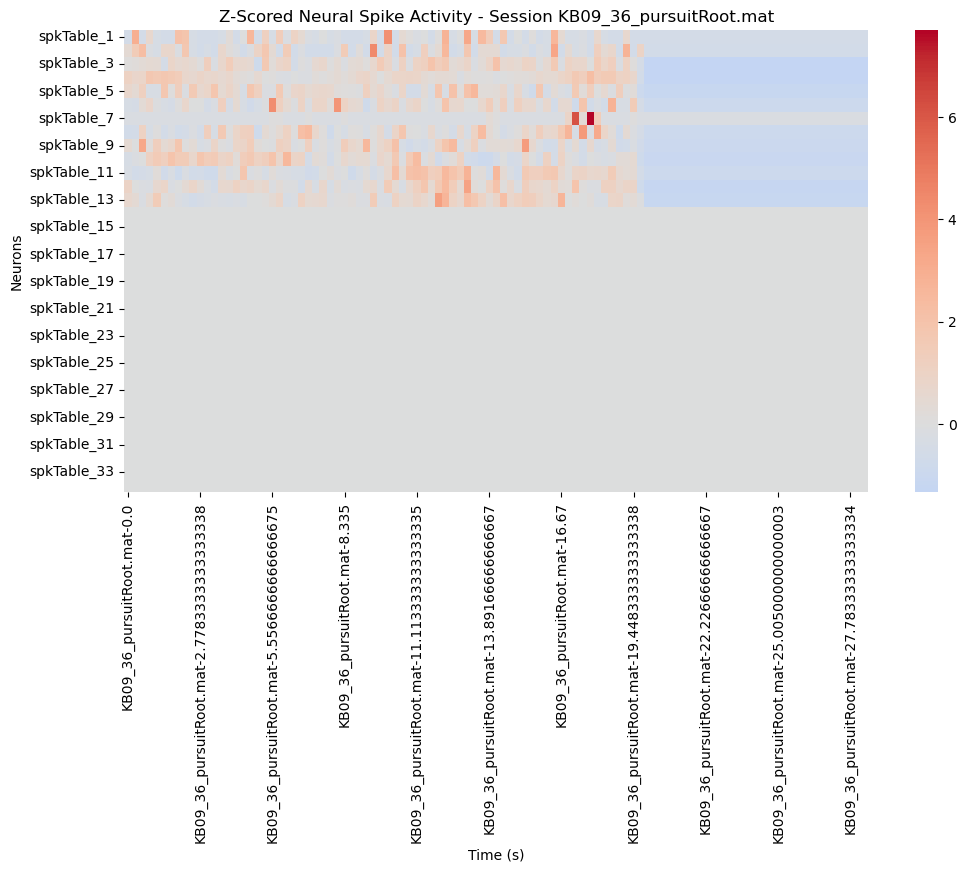

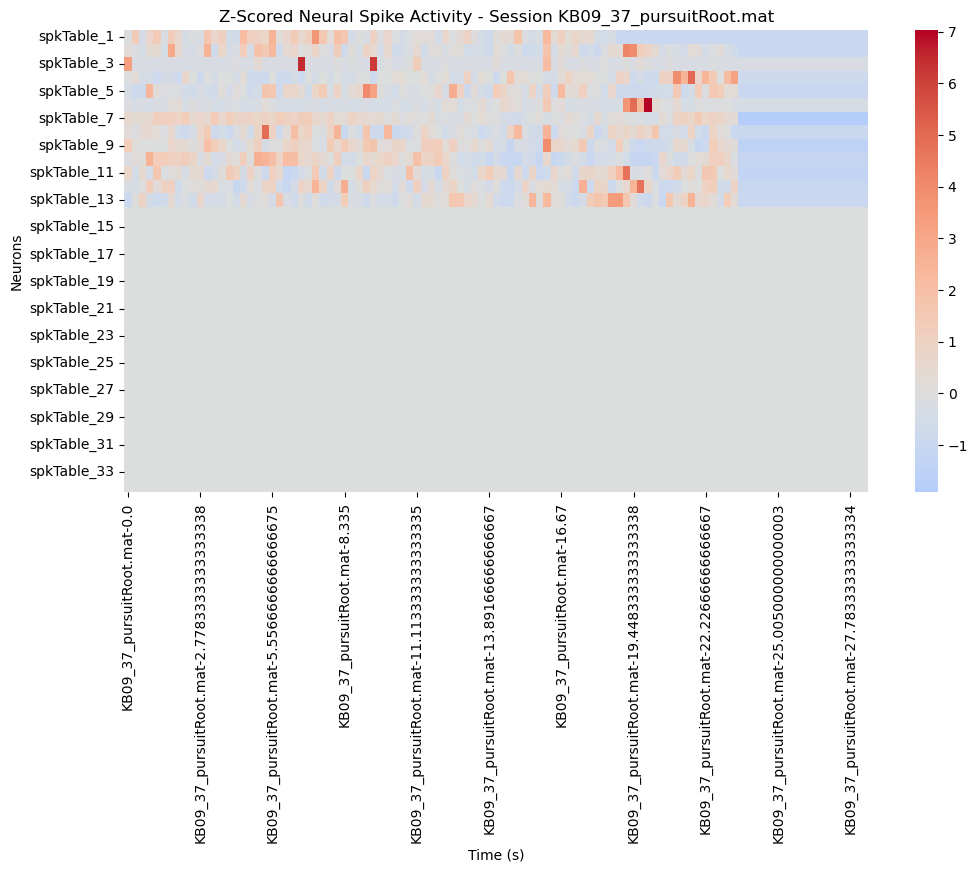

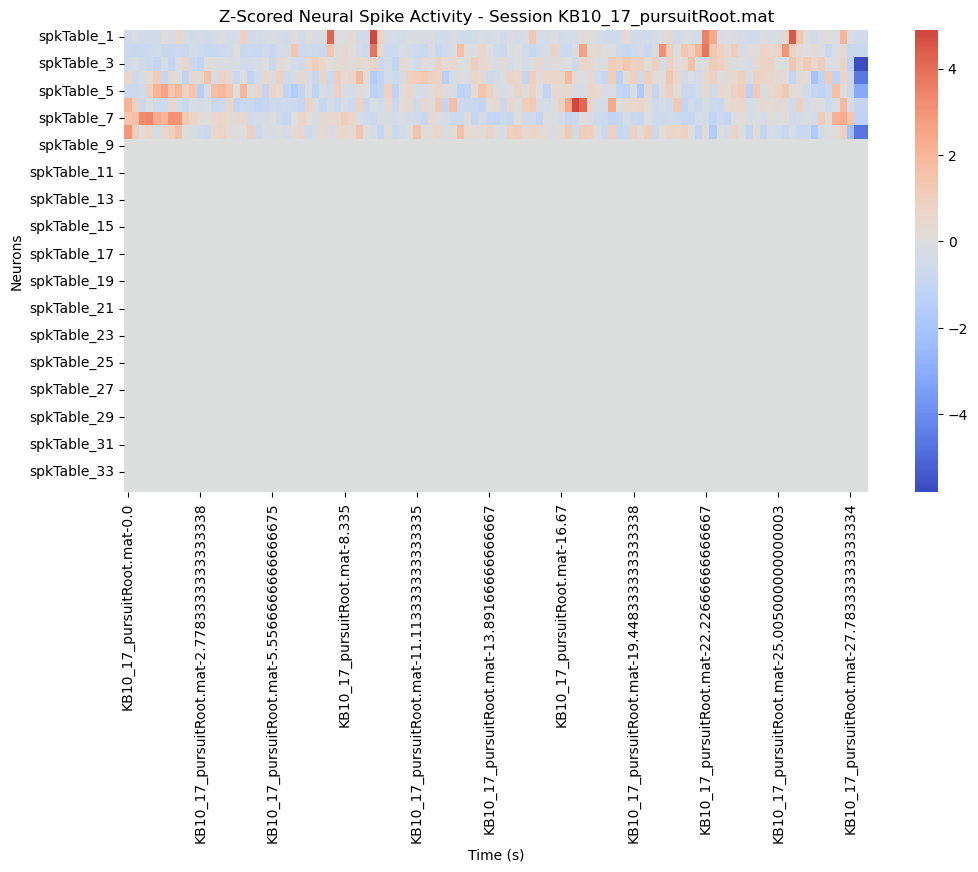

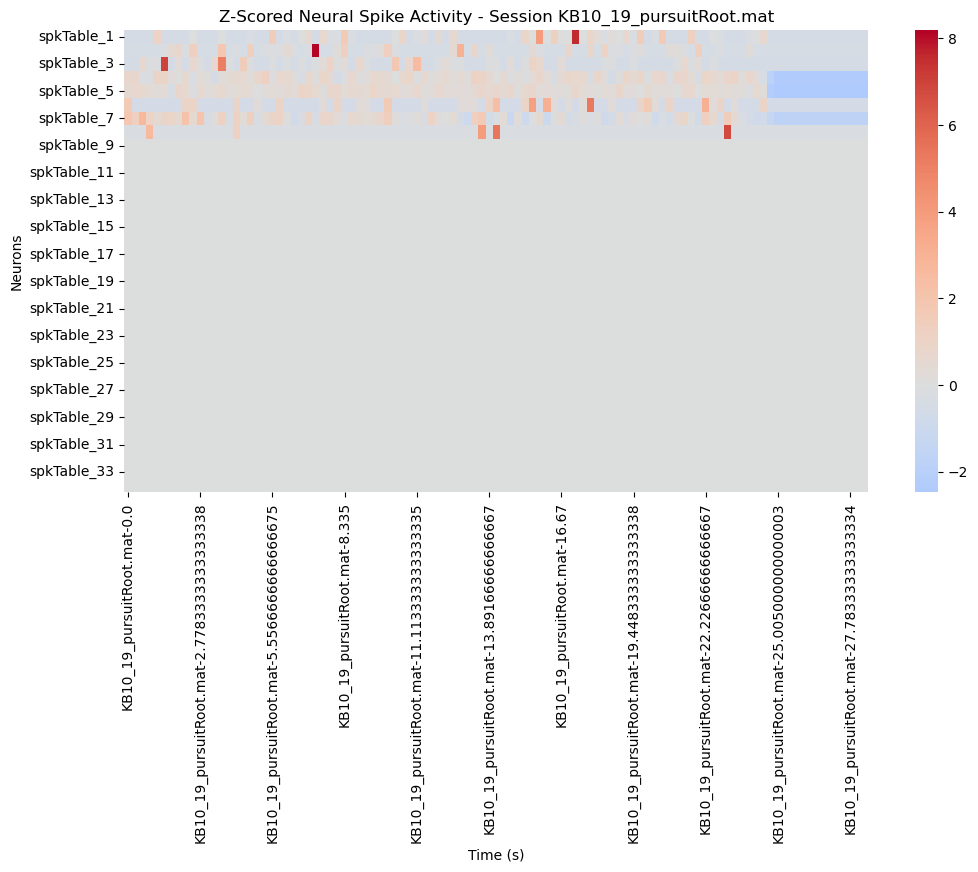

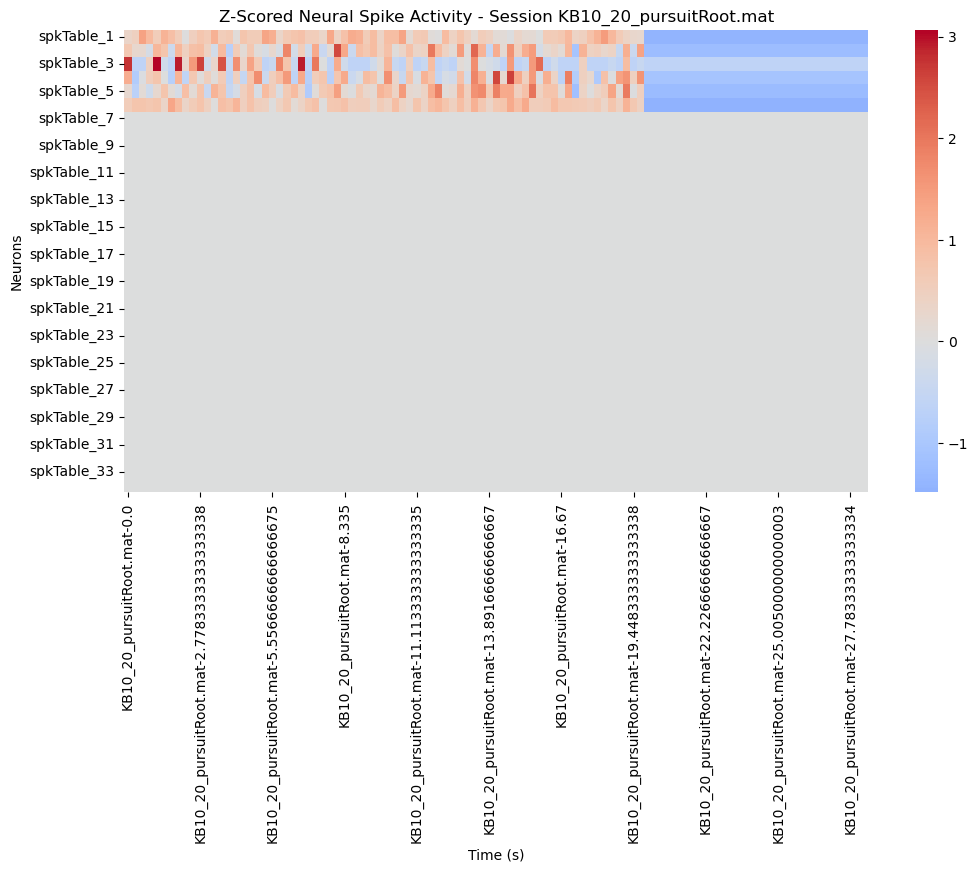

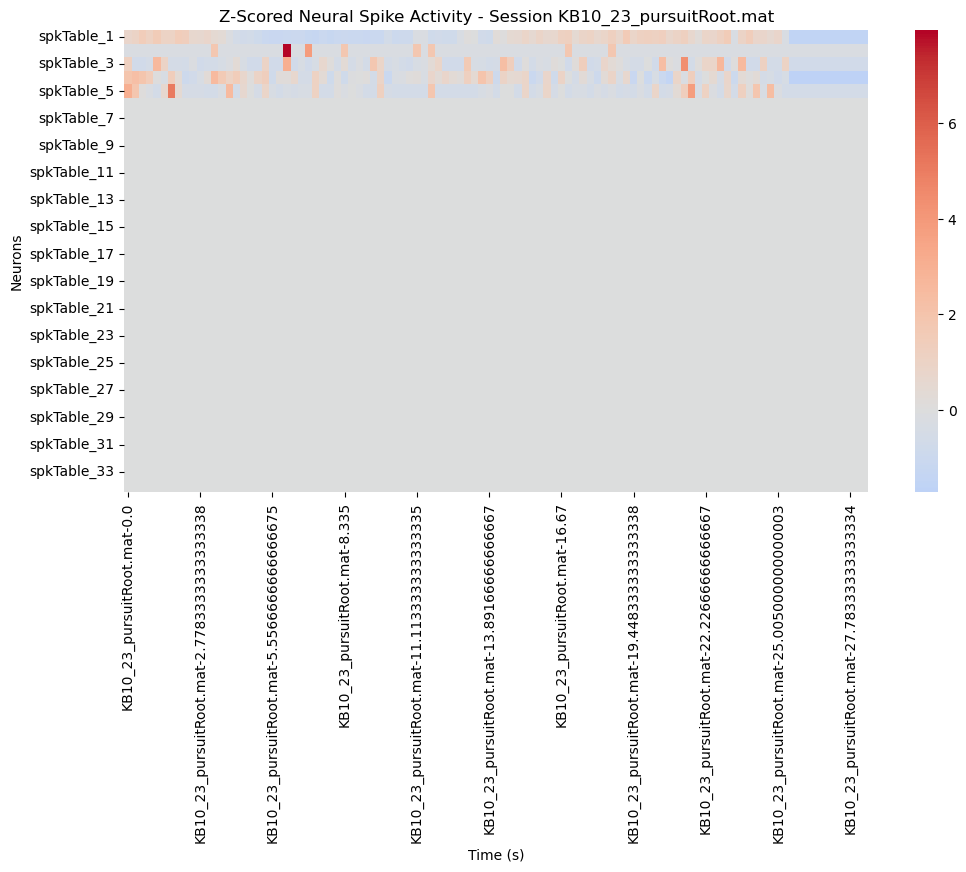

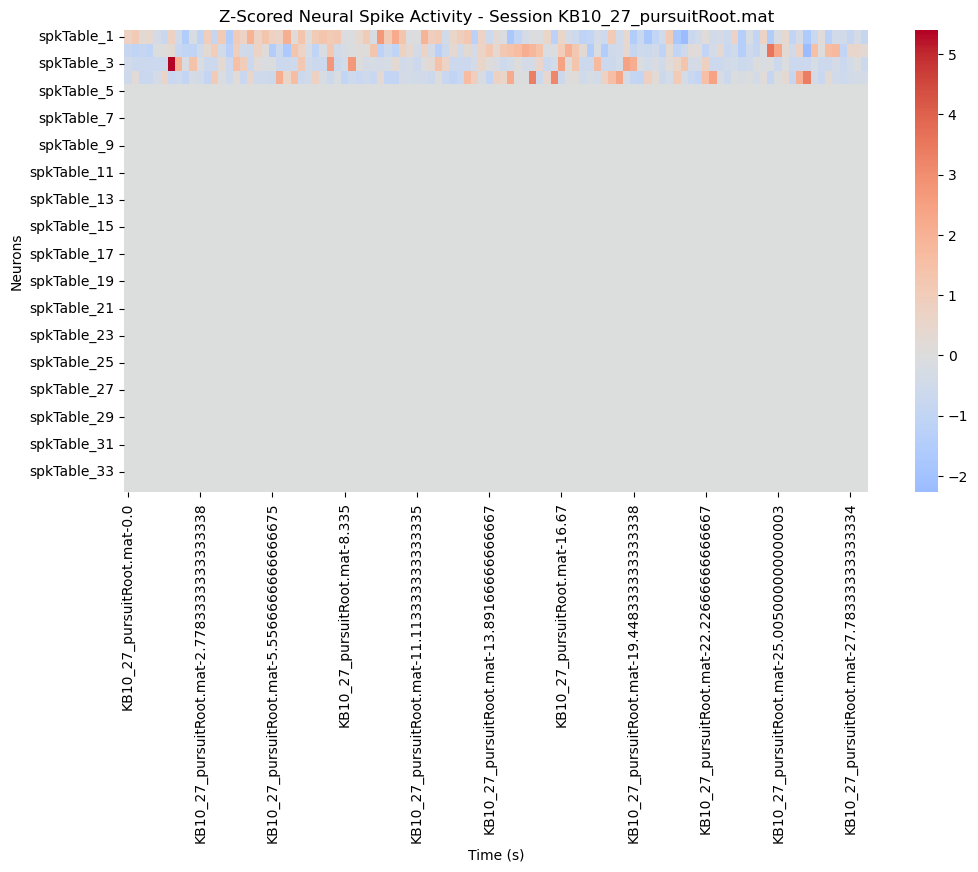

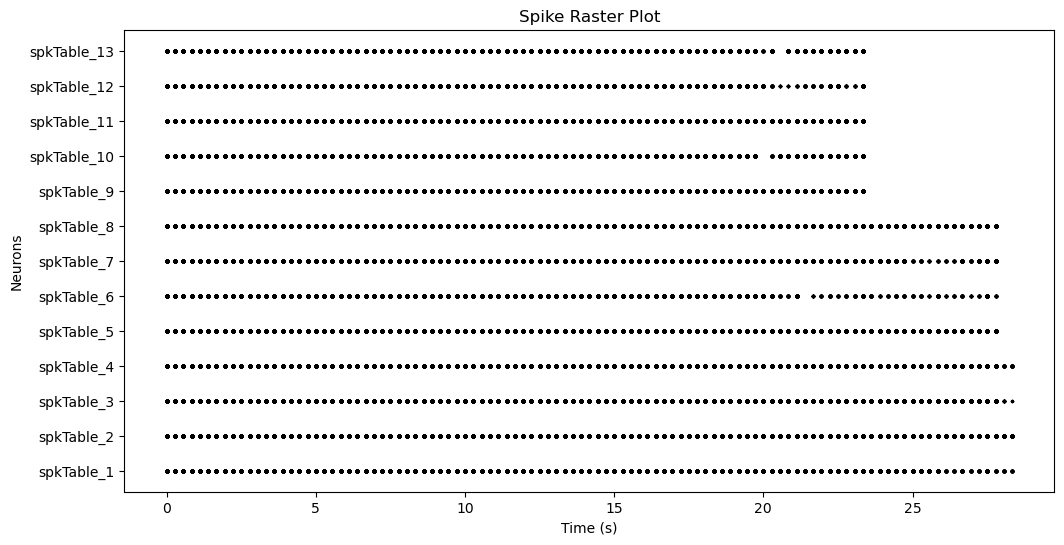

In [70]:
#plot heatmaps of neurons by session
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

### 1️⃣ LOAD & FILTER YOUR DATA ###
# 🛠 EDIT: Ensure your dataset has the required columns
df = all_regions_data[(all_regions_data["region"] == "CA3") & (all_regions_data["trial_block"] == "pursuit")].copy()

# 🛠 EDIT: Ensure necessary columns exist
if "time" not in df.columns or "trial_block" not in df.columns or "region" not in df.columns:
    raise ValueError("Dataset must have 'time', 'trial_block', and 'region' columns!")

# 🛠 EDIT: Detect spike table columns automatically
spike_columns = [col for col in df.columns if "spkTable" in col]

### 2️⃣ NORMALIZE TIME PER SESSION ###
# Ensure sessFile is treated as a category to avoid issues
df["sessFile"] = df["sessFile"].astype("category")

# Compute start time per session and normalize time
df["time"] = df["time"].astype("float64")  # Convert time to float64
df["start_time"] = df.groupby("sessFile")["time"].transform("min")
df["normalized_time"] = df["time"] - df["start_time"]


# 🛠 EDIT: If time is in milliseconds, divide by 1000 before normalization
# df["normalized_time"] = (df["time"] / 1000) - df.groupby("sessFile")["time"].transform("min")

### 3️⃣ CREATE TIME BINS (16.67s) ###
bin_width = 16.67  # Time bin size in seconds
df["time_bin"] = (df["normalized_time"] // bin_width).astype(int)
df["time_seconds"] = df["time_bin"] * (16.67 / 60)

### 4️⃣ AGGREGATE SPIKE COUNTS PER TIME BIN ###
# Convert spike data to integers, replacing NaNs with 0
df[spike_columns] = df[spike_columns].fillna(0).astype(int)

# Group by "sessFile" and "time_bin" to avoid mixing sessions
df_binned = df.groupby(["sessFile", "time_bin"])[spike_columns].sum()
df_binned = df_binned.reset_index()  # Reset index to keep 'time_bin'
df_binned["time_seconds"] = df_binned["time_bin"] * (16.67 / 60)  # Convert to seconds
df_binned = df_binned.set_index(["sessFile", "time_seconds"])  # Re-index using seconds

### 5️⃣ APPLY Z-SCORE NORMALIZATION PER NEURON, PER SESSION ###
# Ensure z-score works even if variance is 0
df_zscored = df_binned.groupby("sessFile").apply(lambda x: x.apply(lambda col: zscore(col, nan_policy="omit") if col.std() > 0 else col, axis=0))

# Verify results
print(df_zscored.head())

### 6️⃣ PLOT HEATMAP FOR EACH SESSION ###
for session in df["sessFile"].unique():
    session_data = df_zscored.loc[session]  # Get session-specific data

    # Remove 'time_bin' if it exists
    if "time_bin" in session_data.columns:
        session_data = session_data.drop(columns=["time_bin"])

    plt.figure(figsize=(12, 6))
    sns.heatmap(session_data.T, cmap="coolwarm", center=0, cbar=True, xticklabels=10)
    plt.xlabel("Time (s)")
    plt.ylabel("Neurons")
    plt.title(f"Z-Scored Neural Spike Activity - Session {session}")
    plt.show()



### 7️⃣ OPTIONAL: RASTER PLOT (SPIKES OVER TIME) ###
plt.figure(figsize=(12, 6))

for neuron in spike_columns:
    neuron_data = df[df[neuron] > 0]  # Get rows where spikes occurred
    plt.scatter(neuron_data["time_seconds"], np.full(len(neuron_data), neuron), s=2, color="black")

plt.xlabel("Time (s)")  # Updated label
plt.ylabel("Neurons")
plt.title("Spike Raster Plot")
plt.show()



In [9]:
#define the start and end indices
pursuit_start = (indices["pursuit_start"].values[0])
pursuit_end = (indices["pursuit_end"].values[0])
FE1_start = (indices["FE1_start"].values[0])
FE1_end = (indices["FE1_end"].values[0])
FE2_start = (indices["FE2_start"].values[0])
FE2_end = (indices["FE2_end"].values[0])

#get dataframe length
max_rows = len(pursuit_df['KB20_09_pursuitRoot.mat'])

#call get_block_rows() before slicing
FE1_start, FE1_end = pursuit_functions.index_utils.get_block_rows(FE1_start, FE1_end, max_rows)
pursuit_start, pursuit_end = pursuit_functions.index_utils.get_block_rows(pursuit_start, pursuit_end, max_rows)
FE2_start, FE2_end = pursuit_functions.index_utils.get_block_rows(FE2_start, FE2_end, max_rows)

#slice the data rows into trial blocks (FE= free explore)
FE1_block = pursuit_df['KB20_09_pursuitRoot.mat'].iloc[FE1_start:FE1_end +1]if FE1_start is not None else None
pursuit_block = pursuit_df['KB20_09_pursuitRoot.mat'].iloc[pursuit_start:pursuit_end +1] if pursuit_start is not None else None
FE2_block = pursuit_df['KB20_09_pursuitRoot.mat'].iloc[FE2_start:FE2_end +1] if FE2_start is not None else None

print("\ncheck out the blocks")
print(pursuit_block)
print(FE1_block)
print(FE2_block)


check out the blocks
              time      ind    ratPos_1    ratPos_2  laserPos_1  laserPos_2  \
2803     46.734268   2804.0  139.363282  123.920803         NaN         NaN   
2804     46.750935   2805.0  139.511148  123.804249         NaN         NaN   
2805     46.767602   2806.0  139.667713  123.696394         NaN         NaN   
2806     46.784269   2807.0  139.824277  123.602455         NaN         NaN   
2807     46.800936   2808.0  139.980842  123.525912         NaN         NaN   
...            ...      ...         ...         ...         ...         ...   
98098  1635.016033  98099.0  149.985313   66.118929         NaN         NaN   
98099  1635.032700  98100.0  150.531549   65.680548         NaN         NaN   
98100  1635.049367  98101.0  151.067348   65.231730         NaN         NaN   
98101  1635.066034  98102.0  151.582271   64.786391         NaN         NaN   
98102  1635.082701  98103.0  152.083277   64.354969         NaN         NaN   

          ratVel     ratAcc  

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


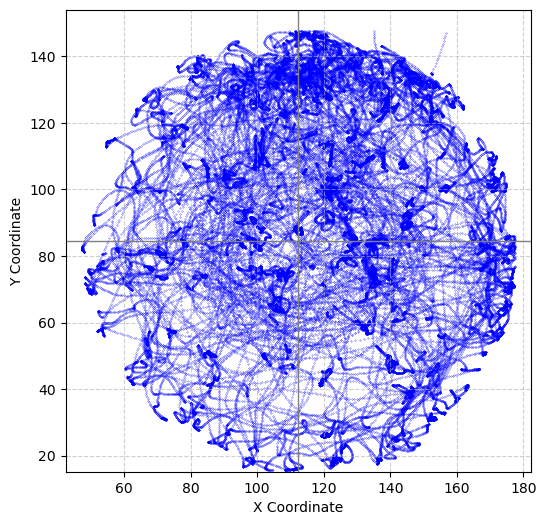

In [10]:
import matplotlib.pyplot as plt 

x = pursuit_block["ratPos_1"]
y = pursuit_block["ratPos_2"]

x_center = (x.max() + x.min()) / 2
y_center = (y.max() + y.min()) / 2

x_range = (x.max() - x.min()) / 2
y_range = (y.max() - y.min()) / 2
limit = max(x_range, y_range)  # Use max range to keep aspect equal

fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(x, y, c='blue', label="Points", s=0.05)

ax.set_xlim([x_center - limit, x_center + limit])
ax.set_ylim([y_center -limit, y_center +limit])

ax.set_aspect('equal', adjustable='datalim')

ax.axhline(y_center, color="gray", linewidth=1)
ax.axvline(x_center, color="gray", linewidth=1)
ax.grid(True, linestyle="--", alpha=0.6)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")



plt.show()